In [1]:
# the usuals
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx

# new for data viz
import seaborn as sns

# interact library
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
#import data
parks=gpd.read_file('data/LA_Parks_Information.geojson')
encamp_19=gpd.read_file('data/2019-311_Homeless_Encampments_Requests-raw.csv')
resources=gpd.read_file('data/Countywide_Parks_and_Open_Space__Public_-_Hosted_.csv')
city=gpd.read_file('data/la-city-council-districts-2012.geojson')

In [3]:
#Clean parks data
#drop non-existent CDs
parks=parks.sort_values(by='cd_real',ascending = False)
parks['cd_real'] = parks['cd_real'].astype(int)
parks_la=parks[parks['cd_real']<=16]
parks_la=parks_la.sort_values(by='cd_real',ascending = True)
#drop unnecessary columns
columns_to_drop = ['objectid',
                   'park_id',
                   'name_alpha',
                   'region',
                   'name_publi',
                   'park_class']
parks_la = parks_la.drop(columns_to_drop,axis=1)
#reset index
parks_la.reset_index(inplace=True)
parks_la = parks_la.rename(columns = {'index':'park_id'})
parks_la.head()

,park_id,name,shape_area,shape_leng,area_acres,issubpark,address,cd_real,geometry
0,471,Vista Hermosa Soccer Field,81856.4316403,1293.65778036,1.87917261403,N,"1301 W 1st St, LA 90026",1,"MULTIPOLYGON (((-118.25717 34.06159, -118.2569..."
1,453,Ernest E Debs Regional Park,13879064.2613,26943.5567173,318.620747882,N,"4235 N Monterey Rd, LA 90032",1,"MULTIPOLYGON (((-118.18803 34.10388, -118.1879..."
2,65,Cleland Avenue Bicentennial Park,40077.2540351,1363.12458794,0.920050834356,N,"4800 E Cleland Ave, LA 90042",1,"MULTIPOLYGON (((-118.21178 34.11341, -118.2118..."
3,1,Sycamore Grove Park,691462.199493,6227.3991903,15.8738513625,N,"4702 N Figueroa St, LA 90042",1,"MULTIPOLYGON (((-118.20110 34.10134, -118.2011..."
4,422,Downey Pool,45451.0029074,941.017165962,1.043415627,Y,"1775 N Spring St, LA 90031",1,"MULTIPOLYGON (((-118.22394 34.07113, -118.2240..."


In [4]:
#Clean encampment data
#drop unnecessary columns
columns_to_drop = ['SRNumber',
                   'UpdatedDate',
                   'ActionTaken',
                   'Owner',
                   'RequestType',
                   'Status',
                   'RequestSource',
                   'Anonymous',
                   'AssignTo',
                   'ServiceDate',
                   'ClosedDate',
                   'Address',
                   'HouseNumber',
                   'Direction',
                   'StreetName',
                   'Suffix',
                   'ZipCode',
                   'Location',
                   'CreatedByUserOrganization',
                   'MobileOS',
                   'TBMPage',
                   'TBMColumn',
                   'TBMRow']
encamp_19 = encamp_19.drop(columns_to_drop,axis=1)
#rename in lower case
encamp_19.columns = ['created',
                     'loc_verified',
                     'approx_loc',
                     'lat',
                     'long',
                     'apc',
                     'cd',
                     'cd_member',
                     'nc',
                     'nc_name',
                     'precinct',
                     'geometry']
encamp_19.head()

,created,loc_verified,approx_loc,lat,long,apc,cd,cd_member,nc,nc_name,precinct,geometry
0,8/26/2019 13:56,Y,N,33.70633171,-118.2929289,Harbor APC,15,Joe Buscaino,96,COASTAL SAN PEDRO NC,HARBOR,None
1,2/23/2019 12:47,Y,N,33.70971583,-118.2864142,Harbor APC,15,Joe Buscaino,96,COASTAL SAN PEDRO NC,HARBOR,None
2,6/30/2019 21:42,Y,,33.71047284,-118.2862046,Harbor APC,15,Joe Buscaino,96,COASTAL SAN PEDRO NC,HARBOR,None
3,6/30/2019 17:34,Y,N,33.71148326,-118.2930027,Harbor APC,15,Joe Buscaino,96,COASTAL SAN PEDRO NC,HARBOR,None
4,7/2/2019 15:15,Y,,33.71372994,-118.293106,Harbor APC,15,Joe Buscaino,96,COASTAL SAN PEDRO NC,HARBOR,None


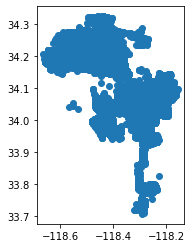

In [5]:
#add geometry to encampments
g_encamp_19 = gpd.GeoDataFrame(
    encamp_19, geometry=gpd.points_from_xy(encamp_19.long, encamp_19.lat))
#match crs
encamp_19=encamp_19.set_crs("EPSG:4326")
encamp_19.crs
encamp_19.plot() 

In [6]:
#clean park amenities
#drop unnecessary columns
columns_to_drop = ['OBJECTID',
                   'RPT_ACRES',
                   'UNIT_ID',
                   'LMS_ID',
                   'PARK_LBL',
                   'GIS_ACRES',
                   'AGNCY_NAME',
                   'ZIP','HOURS',
                   'DGPRK',
                   'GYM',
                   'PHONES',
                   'IS_COUNTY',
                   'PLGND',
                   'POOLS',
                   'Shape__Area',
                   'Shape__Length',
                   'FITZN',
                   'MPFLD',
                   'ADDRESS',
                   'CITY',
                   'SK8PK',
                   'TENIS',
                   'BSKTB',
                   'BASEB',
                   'MPFLD',
                   'SOCCR',
                   'TOTAL_GOOD',
                   'AGNCY_TYP',
                   'AGNCY_LEV',
                   'AGNCY_WEB',
                   'TKIT_SUM',
                   'PRKINF_CND',
                   'AM_TRLS',
                   'TRLS_MI',
                   'SPPAD',
                   'MNG_AGENCY',
                   'NDS_AN_TYP',
                   'NEEDS_ANLZ',
                   'SNRCT',
                   'AMEN_RPT',
                   'COMCT',
                   'AM_OPNSP',
                   'TOTAL_FAIR',
                   'TYPE',
                   'TOTAL_POOR']
resources = resources.drop(columns_to_drop,axis=1)
#rename in lower case
#and we are all clean!
resources.columns = ['name',
                     'access',
                     'type',
                     'picnic',
                     'restroom',
                     'center_lat',
                     'center_long',
                     'geometry']
resources.head()

,name,access,type,picnic,restroom,center_lat,center_long,geometry
0,El Barrio Park,Open Access,Pocket Park,0,1,34.09708079,-117.70442319,None
1,El Dorado Park,Open Access,Neighborhood Park,0,1,34.69157769,-118.12210927,None
2,Atlantic Avenue Park,Open Access,Pocket,2,1,34.02530363,-118.15520092,None
3,El Escorpion Park,Open Access,Community Regional Park,0,0,34.19674178,-118.6641685,None
4,El Marino Park/ El Marino Elementary,Open Access,Pocket Park,2,0,33.99251602,-118.3992332,None


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

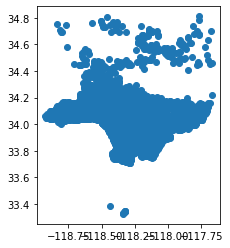

In [7]:
#add resource geometry to make plotable
#and eventually able to merge with park shape
g_resources = gpd.GeoDataFrame(
    resources, geometry=gpd.points_from_xy(resources.center_long, resources.center_lat))
resources.plot() 
resources=resources.set_crs("EPSG:4326")
resources.crs

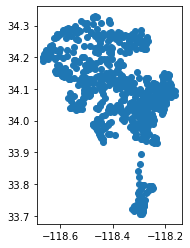

In [8]:
#only include resources within City of LA boundaries.
city=city.set_crs("EPSG:4326")
la_resources = gpd.sjoin(resources, city)
la_resources.plot()

In [9]:
#cleanup
columns_to_drop = ['center_lat',
                   'center_long',
                   'index_right',
                   'kind',
                   'external_id',
                   'name_right',
                   'slug',
                   'set',
                   'metadata',
                   'resource_uri']
la_resources = la_resources.drop(columns_to_drop,axis=1)
la_resources.columns = ['name',
                     'access',
                     'type',
                     'picnic',
                     'restroom',
                     'geometry']
la_resources.head()

,name,access,type,picnic,restroom,geometry
3,El Escorpion Park,Open Access,Community Regional Park,0,0,POINT (-118.66417 34.19674)
33,Garden of the Gods,Open Access,Not Analyzed,0,0,POINT (-118.61100 34.27324)
34,Garden of the Gods Park,Open Access,Community Regional Park,0,0,POINT (-118.60171 34.27451)
50,Gothic Rinaldi Park,Open Access,Not Analyzed,0,0,POINT (-118.48131 34.27801)
51,Granada Hills Park,Open Access,Community Park,1,1,POINT (-118.49679 34.26288)


,park_id,name_left,shape_area,shape_leng,area_acres,issubpark,address,cd_real,geometry,index_right,name_right,access,type,picnic,restroom
0,471,Vista Hermosa Soccer Field,81856.4316403,1293.65778036,1.87917261403,N,"1301 W 1st St, LA 90026",1,"MULTIPOLYGON (((-118.25717 34.06159, -118.2569...",2168,Vista Hermosa Soccer Field,Open Access,Special Use,0,1
1,453,Ernest E Debs Regional Park,13879064.2613,26943.5567173,318.620747882,N,"4235 N Monterey Rd, LA 90032",1,"MULTIPOLYGON (((-118.18803 34.10388, -118.1879...",1003,Ernest E Debs RP,Open Access,Regional Park,2,4
2,65,Cleland Avenue Bicentennial Park,40077.2540351,1363.12458794,0.920050834356,N,"4800 E Cleland Ave, LA 90042",1,"MULTIPOLYGON (((-118.21178 34.11341, -118.2118...",1645,Cleland Ave Bicentennial Park,Open Access,Pocket Park,0,0
3,1,Sycamore Grove Park,691462.199493,6227.3991903,15.8738513625,N,"4702 N Figueroa St, LA 90042",1,"MULTIPOLYGON (((-118.20110 34.10134, -118.2011...",1005,Sycamore Grove Park,Open Access,Community Park,1,1
5,175,Normandie Recreation Center,142508.174306,1575.55772808,3.27155060469,N,"1550 S Normandie Ave, LA 90006",1,"MULTIPOLYGON (((-118.30014 34.04536, -118.2992...",288,Normandie Playground,Open Access,Neighborhood Park,0,0


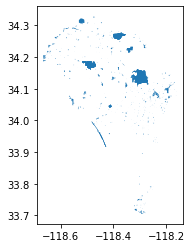

In [10]:
#join resources to parks
park_info = gpd.sjoin(parks_la, la_resources)
park_info.plot()
park_info.head()

In [11]:
#drop subparks
park_info=park_info[park_info['issubpark']=="N"]
#and clean up
columns_to_drop = ['park_id',
                   'index_right',
                    'name_right',
                    'shape_leng',
                    'issubpark']
park_info = park_info.drop(columns_to_drop,axis=1)
park_info.columns = ['name',
                     'park_area',
                     'park_acres',
                     'address',
                     'cd',
                     'geometry',
                     'access',
                     'type',
                     'picnic',
                     'restroom']

In [12]:
#measure encampment reports in parks
park_info['geometry']=park_info.geometry.buffer(.001)
park_encamp = gpd.sjoin(park_info, encamp_19)
park_encamp.head()

<ipython-input-12-afb8fd11bd88>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  park_info['geometry']=park_info.geometry.buffer(.001)


,name,park_area,park_acres,address,cd_left,geometry,access,type,picnic,restroom,...,loc_verified,approx_loc,lat,long,apc,cd_right,cd_member,nc,nc_name,precinct
0,Vista Hermosa Soccer Field,81856.4316403,1.87917261403,"1301 W 1st St, LA 90026",1,"POLYGON ((-118.25821 34.06040, -118.25828 34.0...",Open Access,Special Use,0,1,...,Y,N,34.06169109,-118.2584893,Central APC,1,Gilbert Cedillo,44,GREATER ECHO PARK ELYSIAN NC,RAMPART
1,Ernest E Debs Regional Park,13879064.2613,318.620747882,"4235 N Monterey Rd, LA 90032",1,"POLYGON ((-118.20267 34.09942, -118.20267 34.0...",Open Access,Regional Park,2,4,...,Y,Y,34.1016906,-118.1978547,East Los Angeles APC,1,Gilbert Cedillo,42,ARROYO SECO NC,HOLLENBECK
1,Ernest E Debs Regional Park,13879064.2613,318.620747882,"4235 N Monterey Rd, LA 90032",1,"POLYGON ((-118.20267 34.09942, -118.20267 34.0...",Open Access,Regional Park,2,4,...,Y,,34.1016906,-118.1978547,East Los Angeles APC,1,Gilbert Cedillo,42,ARROYO SECO NC,HOLLENBECK
1,Ernest E Debs Regional Park,13879064.2613,318.620747882,"4235 N Monterey Rd, LA 90032",1,"POLYGON ((-118.20267 34.09942, -118.20267 34.0...",Open Access,Regional Park,2,4,...,Y,,34.10171405,-118.2013037,East Los Angeles APC,1,Gilbert Cedillo,41,HISTORIC HIGHLAND PARK NC,NORTHEAST
3,Sycamore Grove Park,691462.199493,15.8738513625,"4702 N Figueroa St, LA 90042",1,"POLYGON ((-118.20579 34.09726, -118.20581 34.0...",Open Access,Community Park,1,1,...,Y,,34.10171405,-118.2013037,East Los Angeles APC,1,Gilbert Cedillo,41,HISTORIC HIGHLAND PARK NC,NORTHEAST


In [13]:
#add a frequency column
park_encamp['freq'] = park_encamp['name'].map(park_encamp['name'].value_counts())
park_encamp.head()
#and dissolve down since we have our freq count
park_encamp_diss = park_encamp.dissolve(by='name')
#we also need to reset the index
park_encamp_diss = park_encamp_diss.reset_index()
#sort
park_encamp_diss=park_encamp_diss.sort_values(by='name',ascending = True)
park_encamp_diss

,name,geometry,park_area,park_acres,address,cd_left,access,type,picnic,restroom,...,approx_loc,lat,long,apc,cd_right,cd_member,nc,nc_name,precinct,freq
0,1st And Broadway Civic Center Park (TBD),"POLYGON ((-118.24549 34.05495, -118.24542 34.0...",85532.956018,1.96357433772,"217 W 1st St, LA 90012",14,Open Access,Pocket Park,0,0,...,N,34.05292846,-118.2444975,Central APC,14,Jose Huizar,52,DOWNTOWN LOS ANGELES,CENTRAL,34
1,49th Street Pocket Park,"POLYGON ((-118.26344 33.99957, -118.26334 33.9...",8250.43763411,0.189404743709,"670 E 49Th St, LA 90011",9,Open Access,Park Node,0,0,...,N,33.9984056,-118.2645197,South Los Angeles APC,9,Curren D. Price Jr.,125,ZAPATA KING NC,NEWTON,2
2,6th & Gladys Street Park,"POLYGON ((-118.24165 34.03942, -118.24170 34.0...",14823.490385,0.340301875096,"624 E 6th Street, LA 90021",14,Open Access,Pocket Park,1,0,...,N,34.04004454,-118.2421345,Central APC,14,Jose Huizar,52,DOWNTOWN LOS ANGELES,CENTRAL,37
3,76th Street Pocket Park,"POLYGON ((-118.28833 33.96982, -118.28843 33.9...",5591.97634123,0.128374626015,"833 W 76th St, LA 90044",8,Open Access,Park Node,2,0,...,N,33.97051712,-118.2880114,South Los Angeles APC,8,Marqueece Harris-Dawson,123,UNITED FOR VICTORY,77TH STREET,2
4,Albert Piantanida Intergenerational Center,"POLYGON ((-118.44815 34.24514, -118.44805 34.2...",115992.665239,2.66283584046,"9540 N Van Nuys Blvd, Panorama City 91402",6,Restricted Access,Pocket Park,0,0,...,,34.24265591,-118.4502828,North Valley APC,6,Nury Martinez,100,PANORAMA CITY NC,MISSION,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Woodbridge Park,"POLYGON ((-118.37770 34.14885, -118.37770 34.1...",205047.436648,4.70726025805,"11240 W Moorpark St, Studio City 91602",2,Open Access,Neighborhood Park,2,0,...,,34.15018104,-118.3765292,South Valley APC,2,Paul Krekorian,27,STUDIO CITY NC,NORTH HOLLYWOOD,55
272,Woodland Hills Recreation Center,"POLYGON ((-118.61386 34.17465, -118.61438 34.1...",817168.061747,18.7596724157,"5858 N Shoup Ave, Woodland Hills 91367",3,Open Access,Community Park,0,0,...,,34.17471315,-118.6127447,South Valley APC,3,Bob Blumenfield,16,WOODLAND HILLS-WARNER CENTER NC,TOPANGA,3
273,Woodside Triangle,"POLYGON ((-118.20650 34.09950, -118.20641 34.0...",7562.9668937,0.173622524005,Woodside Dr & Marmion Way,1,Open Access,Not Analyzed,0,0,...,N,34.09815761,-118.2054158,East Los Angeles APC,1,Gilbert Cedillo,42,ARROYO SECO NC,NORTHEAST,4
274,York Blvd Pocket Park,"POLYGON ((-118.20610 34.12106, -118.20611 34.1...",12788.6660416,0.293588549046,"4948-4956 E York Blvd, LA 90042",14,Open Access,Pocket Park,0,1,...,,34.12132717,-118.2073718,East Los Angeles APC,14,Jose Huizar,41,HISTORIC HIGHLAND PARK NC,NORTHEAST,2


In [14]:
#make sure we are in mercator
park_encamp_diss = park_encamp_diss.to_crs(epsg=3857)

,name,geometry,park_area,park_acres,address,cd_left,access,type,picnic,restroom,...,approx_loc,lat,long,apc,cd_right,cd_member,nc,nc_name,precinct,freq
0,1st And Broadway Civic Center Park (TBD),"POLYGON ((-13163027.936 4036182.702, -13163019...",85532.956018,1.96357433772,"217 W 1st St, LA 90012",14,Open Access,Pocket Park,0,0,...,N,34.05292846,-118.2444975,Central APC,14,Jose Huizar,52,DOWNTOWN LOS ANGELES,CENTRAL,34
1,49th Street Pocket Park,"POLYGON ((-13165025.750 4028743.897, -13165014...",8250.43763411,0.189404743709,"670 E 49Th St, LA 90011",9,Open Access,Park Node,0,0,...,N,33.9984056,-118.2645197,South Los Angeles APC,9,Curren D. Price Jr.,125,ZAPATA KING NC,NEWTON,2
2,6th & Gladys Street Park,"POLYGON ((-13162600.766 4034096.386, -13162605...",14823.490385,0.340301875096,"624 E 6th Street, LA 90021",14,Open Access,Pocket Park,1,0,...,N,34.04004454,-118.2421345,Central APC,14,Jose Huizar,52,DOWNTOWN LOS ANGELES,CENTRAL,37
3,76th Street Pocket Park,"POLYGON ((-13167796.518 4024749.976, -13167807...",5591.97634123,0.128374626015,"833 W 76th St, LA 90044",8,Open Access,Park Node,2,0,...,N,33.97051712,-118.2880114,South Los Angeles APC,8,Marqueece Harris-Dawson,123,UNITED FOR VICTORY,77TH STREET,2
4,Albert Piantanida Intergenerational Center,"POLYGON ((-13185588.013 4061765.495, -13185577...",115992.665239,2.66283584046,"9540 N Van Nuys Blvd, Panorama City 91402",6,Restricted Access,Pocket Park,0,0,...,,34.24265591,-118.4502828,North Valley APC,6,Nury Martinez,100,PANORAMA CITY NC,MISSION,11


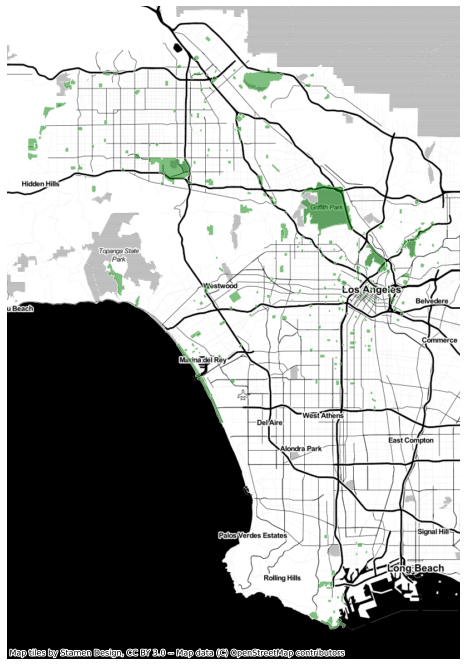

In [15]:
#let's see how this is looking
ax=park_encamp_diss.plot(figsize=(12,12),
                      color='Green', 
                      edgecolor='white',
                      alpha=0.5)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.Toner)
park_encamp_diss.head()

In [16]:
#some columns are not accurate anymore
#like encampment details, since we dissolved
#time to clean some more!
columns_to_drop = ['cd_left',
                   'index_right',
                   'created',
                    'loc_verified',
                    'approx_loc',
                    'lat',
                    'long',
                    'apc'
                        ]
park_encamp_diss = park_encamp_diss.drop(columns_to_drop,axis=1)
park_encamp_diss.columns = ['name',
                     'geometry',
                     'park_area',
                     'park_acres',
                     'address',
                     'access',
                     'park_type',
                     'picnic',
                     'restroom',
                     'cd',
                     'cd_member',
                     'nc',
                     'nc_name',
                     'precinct',
                     'freq'
                       ]
park_encamp_diss.head()

,name,geometry,park_area,park_acres,address,access,park_type,picnic,restroom,cd,cd_member,nc,nc_name,precinct,freq
0,1st And Broadway Civic Center Park (TBD),"POLYGON ((-13163027.936 4036182.702, -13163019...",85532.956018,1.96357433772,"217 W 1st St, LA 90012",Open Access,Pocket Park,0,0,14,Jose Huizar,52,DOWNTOWN LOS ANGELES,CENTRAL,34
1,49th Street Pocket Park,"POLYGON ((-13165025.750 4028743.897, -13165014...",8250.43763411,0.189404743709,"670 E 49Th St, LA 90011",Open Access,Park Node,0,0,9,Curren D. Price Jr.,125,ZAPATA KING NC,NEWTON,2
2,6th & Gladys Street Park,"POLYGON ((-13162600.766 4034096.386, -13162605...",14823.490385,0.340301875096,"624 E 6th Street, LA 90021",Open Access,Pocket Park,1,0,14,Jose Huizar,52,DOWNTOWN LOS ANGELES,CENTRAL,37
3,76th Street Pocket Park,"POLYGON ((-13167796.518 4024749.976, -13167807...",5591.97634123,0.128374626015,"833 W 76th St, LA 90044",Open Access,Park Node,2,0,8,Marqueece Harris-Dawson,123,UNITED FOR VICTORY,77TH STREET,2
4,Albert Piantanida Intergenerational Center,"POLYGON ((-13185588.013 4061765.495, -13185577...",115992.665239,2.66283584046,"9540 N Van Nuys Blvd, Panorama City 91402",Restricted Access,Pocket Park,0,0,6,Nury Martinez,100,PANORAMA CITY NC,MISSION,11


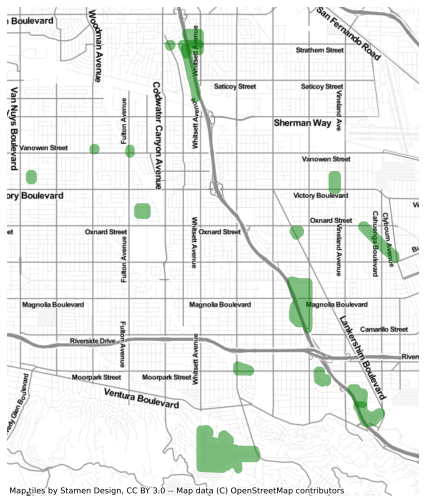

In [17]:
# table
park_encamp_diss[park_encamp_diss.cd == '1'].head()

# map
ax = park_encamp_diss[park_encamp_diss.cd == '2'].plot(figsize=(9,9), markersize=1, color='green', alpha=0.5)

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

In [18]:
# create a function
def park_encamp_by(cd='1'):
    # table
    display(park_encamp_diss[park_encamp_diss.cd == cd].head()) 
    
    # map
    ax = park_encamp_diss[park_encamp_diss.cd == cd].plot(figsize=(9,9), markersize=2, color='green', alpha=0.5)
    
    # axis
    ax.axis('off')
    
    # basemap
    ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

,name,geometry,park_area,park_acres,address,access,park_type,picnic,restroom,cd,cd_member,nc,nc_name,precinct,freq
47,Costanso Fire Station 84 Park,"POLYGON ((-13202049.155 4051194.494, -13202052...",15751.4223392,0.361604346764,"5340 N Canoga Ave, LA 91364",Open Access,Pocket Park,0,0,3,Bob Blumenfield,16,WOODLAND HILLS-WARNER CENTER NC,TOPANGA,9
114,John Quimby Park,"POLYGON ((-13201098.245 4055212.620, -13201099...",166565.117937,3.823824247,"7008 N De Soto Ave, Canoga Park 91306",Open Access,Neighborhood Park,0,0,3,Bob Blumenfield,14,WINNETKA NC,TOPANGA,16
118,LAPD SWAT Officer Randal D Simmons Park,"POLYGON ((-13196260.438 4054576.383, -13196261...",351997.334695,8.08077921691,"6731 N Wilbur Ave, Reseda 91335",Open Access,Neighborhood Park,0,0,3,Bob Blumenfield,15,RESEDA NC,WEST VALLEY,6
123,Lanark Recreation Center,"POLYGON ((-13202689.663 4057657.306, -13202691...",836281.45638,19.1984573351,"21816 W Lanark St, Canoga Park 91304",Open Access,Community Park,0,1,3,Bob Blumenfield,13,CANOGA PARK NC,TOPANGA,11
184,Reseda Park,"POLYGON ((-13195317.680 4054432.587, -13195315...",1292791.20373,29.6785210034,"18411 W Victory Blvd, 91335",Open Access,Community Regional Park,1,1,3,Bob Blumenfield,15,RESEDA NC,WEST VALLEY,13


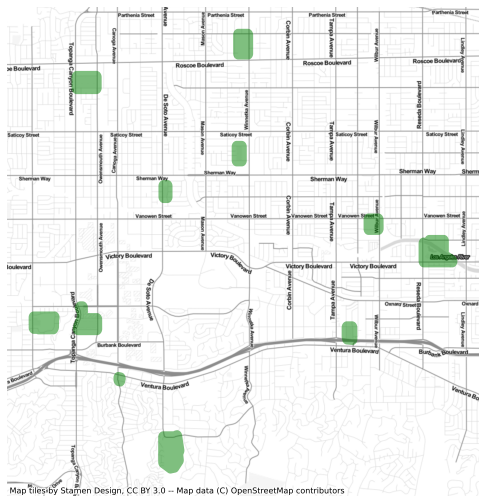

In [19]:
# call the function
park_encamp_by(cd = '3')

In [20]:
#to go one step further, let's make it interactive
@interact
def park_encamp_by(cd='1'):
    # table
    display(park_encamp_diss[park_encamp_diss.cd == cd].head()) 
    
    # map
    ax = park_encamp_diss[park_encamp_diss.cd == cd].plot(figsize=(9,9), markersize=2, color='green', alpha=0.5)
    
    # axis
    ax.axis('off')
    
    # basemap
    ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

interactive(children=(Text(value='1', description='cd'), Output()), _dom_classes=('widget-interact',))

In [21]:
#and add a second variable
@interact

def park_encamp_by(cd=park_encamp_diss.cd,park_type=park_encamp_diss.park_type.unique().tolist()):
    # table
    display(park_encamp_diss[(park_encamp_diss.cd == cd)&(park_encamp_diss.park_type==park_type)].head()) 

    # map
    ax = park_encamp_diss[(park_encamp_diss.cd == cd)&(park_encamp_diss.park_type==park_type)].plot(figsize=(9,9), markersize=10, color='green', alpha=0.5)
    
    # axis
    ax.axis('off')

    # basemap
    ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

interactive(children=(Dropdown(description='cd', options=('14', '9', '14', '8', '6', '14', '8', '14', '1', '11…